# Análisis de la actividad 3: Densidad de ruido espectral
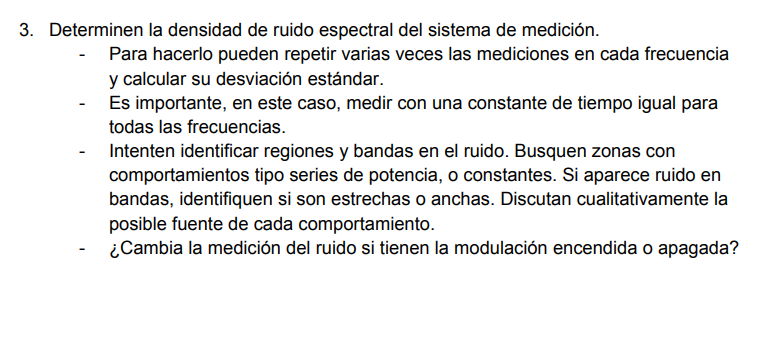

In [8]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib widget

R_m   = np.loadtxt('datos/Rmean_p3_fc8_s12_o3.txt')
R_std = np.loadtxt('datos/Rstd_p3_fc8_s12_o3.txt')

T_m   = np.loadtxt('datos/Tmean_p3_fc8_s12_o3.txt')
T_std = np.loadtxt('datos/Tstd_p3_fc8_s12_o3.txt')

frecs = np.logspace(np.log10(40), np.log10(50000), 50, dtype=int)

fig, ax  = plt.subplots(1,2, figsize = (16,7),facecolor = 'white')
ax[0].plot(frecs, R_std[150:])
ax[0].set_xlabel('Frecuencia [Hz]')
ax[0].set_ylabel('Ruido [V]')
ax[0].set_title('Ruido en función de la frecuencia')
ax[0].set_xscale('log')
ax[0].set_yscale('log')

ax[1].plot(frecs, np.log10(R_std[150:]*2/0.1))
ax[1].set_xlabel('Frecuencia [Hz]')
ax[1].set_ylabel('Transferencia del ruido [db]')
# ax[1].set_xscale('log')
# ax[1].set_yscale('log')
#ax[1].set_title('Ruido en función de la frecuencia')

<ipython-input-8-2e1249da10ec>:9: UserWarning: loadtxt: Empty input file: "datos/Tstd_p3_fc8_s12_o3.txt"
  T_std = np.loadtxt('datos/Tstd_p3_fc8_s12_o3.txt')


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'Transferencia del ruido [db]')

# Mediciones 28/05

In [9]:
R_m  = np.loadtxt('datos_2805/Rmean_p3_fc19_s11_o0.txt')
R_std = np.loadtxt('datos_2805/Rstd_p3_fc19_s11_o0.txt')
R_grande_std = np.loadtxt('datos_2805/Rstd_grande_p3_fc19_s11_o0.txt')

R_std_sin_ref = np.loadtxt('datos_2805/Rstd_p3_fc19_s12_o0_sin_ref.txt')

frecs = np.logspace(np.log10(10), np.log10(50000), 200, dtype=int)
frecs_grande = np.logspace(np.log10(40000), np.log10(100000), 50, dtype=int)
frecs_sin_ref = np.logspace(np.log10(10), np.log10(50000), 50, dtype=int)

x = np.linspace(10,1000,1000)
y =  -7.21706205e-11*x  -4.52760091e-08
y_log = np.log(x)*-2.18793544e-08 + 1.30007172e-07

plt.figure(facecolor ='w')
plt.plot(frecs, R_std, '.')
plt.plot(frecs_grande, R_grande_std, '.')
plt.plot(x,y)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Ruido [V]')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'Ruido [V]')

In [33]:
(4.92e-9-1.24e-8)/(270-108)
np.sqrt((4.92e-9-1.24e-8)**2 +  (270-108)**2)
frecs[110]

1108

### Comparacion del Ruido con la señal prendida y apagada

In [30]:
plt.figure(facecolor = 'w')
plt.plot(frecs, R_std, '.', label = 'Señal prendida')
plt.plot(frecs_sin_ref, R_std_sin_ref, '.', label = 'Señal apagada')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Ruido [V]')
plt.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [25]:
from scipy.optimize import curve_fit
def lineal(x, m, b):
    y = m*x + b
    return y
#P0 = [-7.21706205e-11,  4.52760091e-08, 0]
def log(x,m, a):
    y = np.log(x)*m +a
    return y

popt, pcov = curve_fit(lineal, np.log10(np.concatenate((R_std[:31],R_std[32:110]))), np.log10(np.concatenate((frecs[:31],frecs[32:110]))))
perr = np.sqrt(np.diag(pcov))

popt

array([-1.00546934, -5.92259473])

In [24]:
frecs[:110][31]
R_std[:110], R_std[31]

np.concatenate((R_std[:31],R_std[32:110]))

array([1.24357664e-07, 1.26228512e-07, 1.27178041e-07, 1.25900621e-07,
       1.14664471e-07, 1.14790084e-07, 1.05282256e-07, 1.06683794e-07,
       9.80859162e-08, 8.99112114e-08, 9.05088070e-08, 8.44656430e-08,
       8.02544513e-08, 7.92838947e-08, 7.39329278e-08, 7.88391477e-08,
       6.76370485e-08, 6.42826314e-08, 6.26229885e-08, 5.95539634e-08,
       5.63237980e-08, 5.55975149e-08, 5.16022141e-08, 5.10013818e-08,
       4.73560715e-08, 4.62248285e-08, 4.34110146e-08, 4.21134804e-08,
       4.09403428e-08, 3.94814237e-08, 3.75099826e-08, 3.50539200e-08,
       2.82253790e-08, 3.12367106e-08, 3.06441402e-08, 2.80844996e-08,
       2.76504492e-08, 2.60073279e-08, 2.48339662e-08, 2.15772206e-08,
       2.38352636e-08, 2.34756358e-08, 2.15607268e-08, 1.98240296e-08,
       1.92433051e-08, 1.81857576e-08, 1.72207680e-08, 1.57885327e-08,
       1.60791514e-08, 1.57445626e-08, 1.57098814e-08, 1.42583592e-08,
       1.39398337e-08, 1.28098461e-08, 1.24504810e-08, 1.13638217e-08,
      

In [26]:
%matplotlib widget
x = np.linspace(-9, -7, 50)

plt.plot(np.log10(R_std[:110]),np.log10(frecs[:110]) ,'.')
plt.plot(x, popt[0]*x+popt[1])
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

$ \log{R} = A \log(f) + B $ $\Rightarrow$  $e^B f^A = R$ $\Rightarrow$ esto va como $f^{-1}$

In [31]:
x = np.linspace(10, 1000,1000)
A = popt[0]
B = 10**(popt[1])
y =  B * (x**A)

plt.figure(facecolor ='w')
plt.plot(frecs, R_std, '.')
plt.plot(frecs_grande, R_grande_std, '.')
plt.plot(x,y)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Ruido [V]')
plt.grid()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …